In [36]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import cv2

In [37]:
def calculate_eigh_ATA(A):
    '''
        Calculate the eigenvalues and eigenvectors of matrix A^T.A
        Arguments:
            A: numpy array - the image
        Returns:
            eigenvalues: numpy array
            eigenvectors: numpy array
    '''
    AT_A = np.dot(A.T, A)
    eigenvalues, eigenvectors = la.eigh(AT_A)
    eigenvalues = np.maximum(eigenvalues, 0.)

    sorted_index = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[sorted_index]
    eigenvectors = eigenvectors[:, sorted_index]

    return eigenvalues, eigenvectors

def calculate_svd(A):
    '''
        Using SVD to calculate U, sigma and V^T matrices of matrix A
        Arguments:
            A: numpy array - the image
        Returns:
            U: numpy array
            sigma: numpy array
            V_T: numpy array
    '''
    m = A.shape[0]
    n = A.shape[1]
    if m >= n:
        eigenvalues, eigenvectors = calculate_eigh_ATA(A.T)

        sigma = np.zeros([m, n])
        for i in range(min(m, n)):
            sigma[i][i] = max(eigenvalues[i], 0.)
        sigma = np.maximum(np.sqrt(sigma), 0)
        U = eigenvectors

        V = np.zeros([n, n])
        for i in range(n):
            V[:, i] = np.dot(A.T, U[:, i]) / sigma[i][i]
        V_T = V.T
    else:
        eigenvalues, eigenvectors = calculate_eigh_ATA(A)

        sigma = np.zeros([m, n])
        for i in range(min(m, n)):
            sigma[i][i] = max(eigenvalues[i], 0.)
        sigma = np.maximum(np.sqrt(sigma), 0)
        V = eigenvectors
        V_T = V.T

        U = np.zeros([m, m])
        for i in range(m):
            U[:, i] = sigma[i][i] * np.dot(A, V[:, i]) / sigma[i][i]

    return U, sigma, V_T


def find_A_approx(A, rank):
    '''
        Calculate the matrix A_approximately of A with rank using SVD
        Arguments:
            A: numpy array - the image
            rank: int - the rank of the approximate matrix,
                the greater the rank is the more accuracy the approximate image is
        Returns:
            result: numpy array - the approximately image
            error: double - the error of the approximate image
    '''
    U, sigma, V_T = calculate_svd(A)
    new_A = np.zeros(A.shape)
    new_A = U[:, :rank] @ sigma[:rank, :rank] @ V_T[:rank, :]
    if rank < min(A.shape[0], A.shape[1]):
      error = np.sum(sigma[rank:, :])/ np.sum(sigma)
    else:
      error = 0.
    return new_A, error

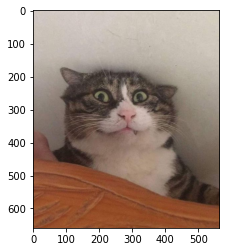

In [38]:
default_image = cv2.imread('image2.jpg')
default_image = cv2.cvtColor(default_image, cv2.COLOR_BGR2RGB)
plt.imshow(default_image)
plt.show()

In [39]:
default_image.shape

(659, 564, 3)

In [40]:
red_channel = default_image[:, :, 0]/255.
green_channel = default_image[:, :, 1]/255.
blue_channel = default_image[:, :, 2]/255.

In [41]:
print("Red\n", red_channel.shape)
print("Green\n", green_channel.shape)
print("Blue\n", blue_channel.shape)

Red
 (659, 564)
Green
 (659, 564)
Blue
 (659, 564)


In [46]:
max_rank = la.matrix_rank(blue_channel)
while True:
  try:
    rank = int(input("Input rank: "))
    if rank > max_rank:
      print('The number must be equal or less than', max_rank, '! Try again!')
    elif rank < 0:
      print('The number must be positive! Try again!')
    else:
      break
  except ValueError:
    print('Please input a number!. Try again!')
  except:
    print('Something went wrong')

In [48]:
red_compressed, _ = find_A_approx(red_channel, rank)
green_compressed, _ = find_A_approx(green_channel, rank)
blue_compressed, _ = find_A_approx(blue_channel, rank)
new_image = np.stack((red_compressed, green_compressed, blue_compressed), axis=2)

In [49]:
new_image.shape

(659, 564, 3)

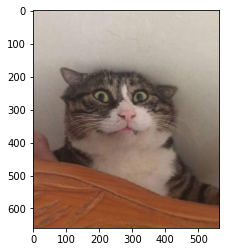

In [50]:
plt.imshow(new_image)
plt.show()

In [51]:
def interact_image(rank):
    red_compressed, er = find_A_approx(red_channel, rank)
    green_compressed, er = find_A_approx(green_channel, rank)
    blue_compressed, er = find_A_approx(blue_channel, rank)
    new_image = np.stack((red_compressed, green_compressed, blue_compressed), axis=2)
    plt.imshow(new_image)
    plt.show()

In [53]:
from ipywidgets import interact

interact(interact_image, rank=(1,max_rank))

interactive(children=(IntSlider(value=282, description='rank', max=564, min=1), Output()), _dom_classes=('widg…

<function __main__.interact_image(rank)>